# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import stats

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
df_yearly.shape

(12, 4)

In [6]:
df_monthly.shape

(98, 3)

In [7]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [8]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [9]:
df_yearly.year

0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64

### Check for Nan Values and Duplicates

In [10]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [11]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [12]:
df_yearly.isna().values.any()

False

In [13]:
df_monthly.isna().values.any()

False

In [14]:
df_yearly.duplicated().values.any()

False

In [15]:
df_monthly.duplicated().values.any()

False

### Descriptive Statistics

In [16]:
df_monthly.births.mean()

267.0

In [17]:
df_monthly.deaths.mean()

22.46938775510204

In [18]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, we calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [19]:
print(f"{round(df_yearly.deaths.sum() / df_yearly.births.sum() * 100, 2)} %") 

7.08 %


# Visualize the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

We create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes with the following specifications:

* Format the x-axis using locators for the years and months 
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 


In [20]:
# create locators for ticks on the same axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

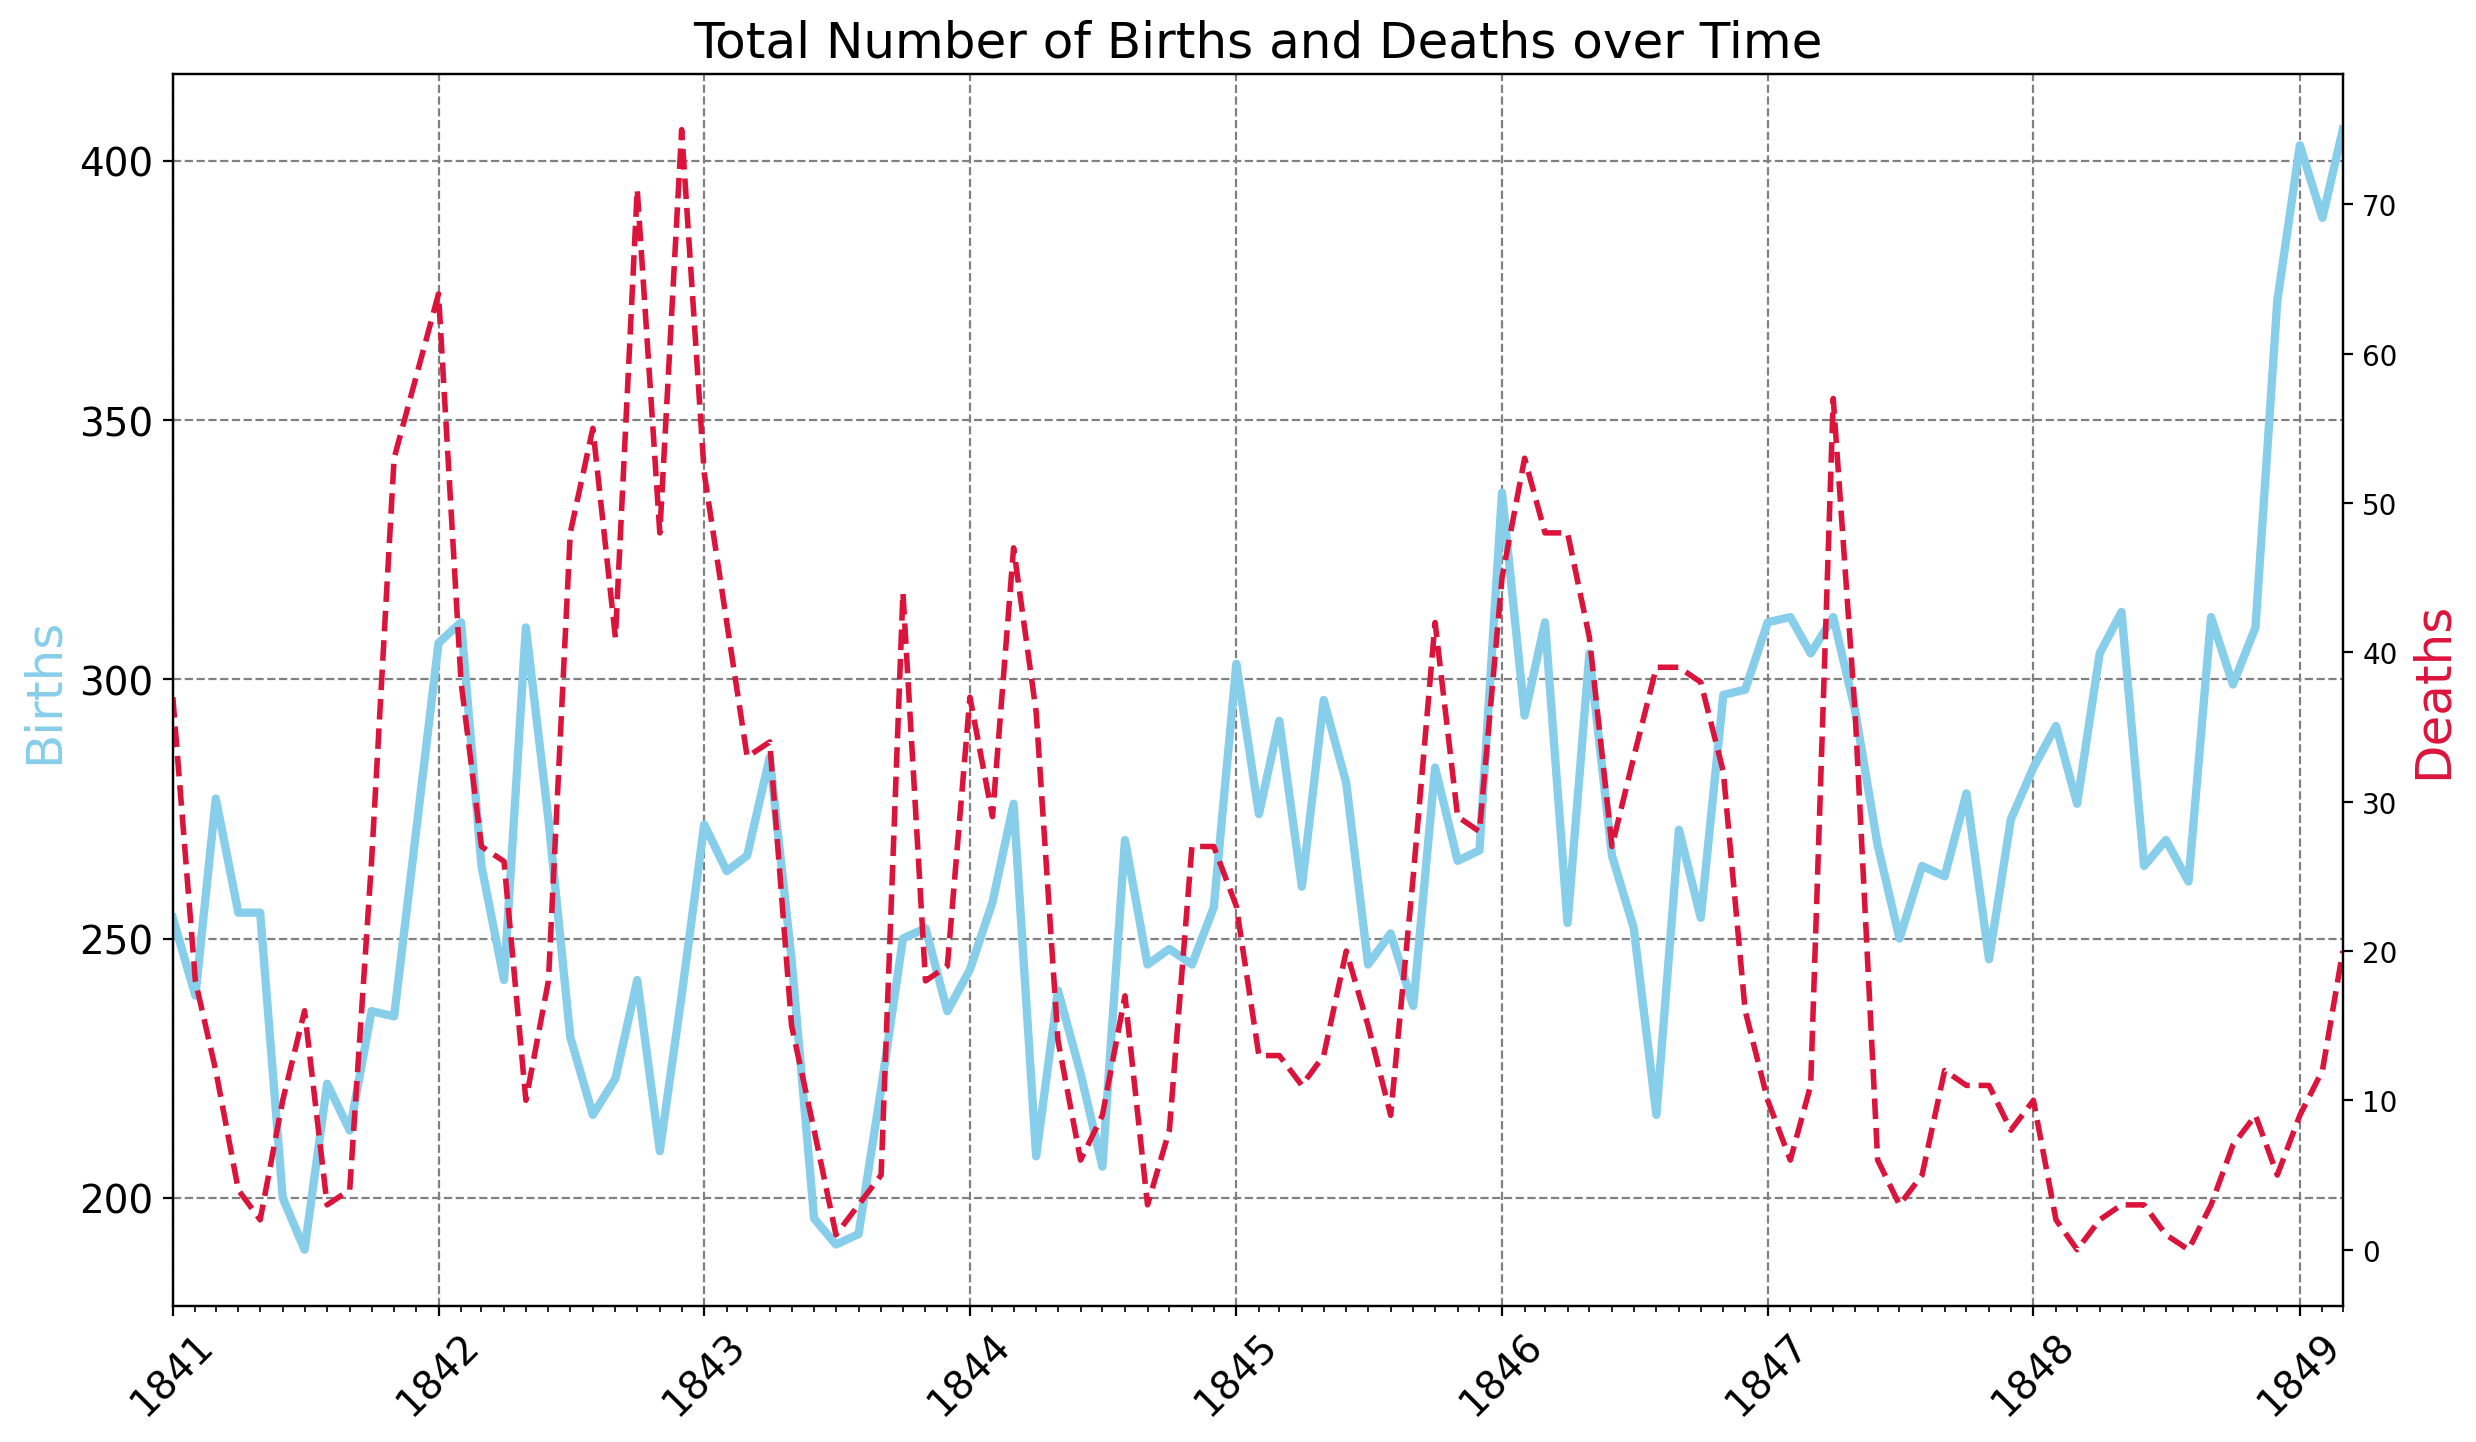

In [21]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Births and Deaths over Time', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(df_monthly.date,
         df_monthly.births, 
         color = 'skyblue', 
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths, 
         color = 'crimson', 
         linewidth=2,
         linestyle='--')


ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

ax1.set_xlim(left=df_monthly.date.min(), right=df_monthly.date.max())
ax1.grid(color='grey', linestyle='--')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

We see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births.

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. We use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 

* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [22]:
clinic1 = df_yearly[df_yearly.clinic == 'clinic 1']
clinic2 = df_yearly[df_yearly.clinic == 'clinic 2']

In [23]:
clinic1

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
5  1846    4010     459  clinic 1

In [24]:
clinic2

year  births  deaths    clinic
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

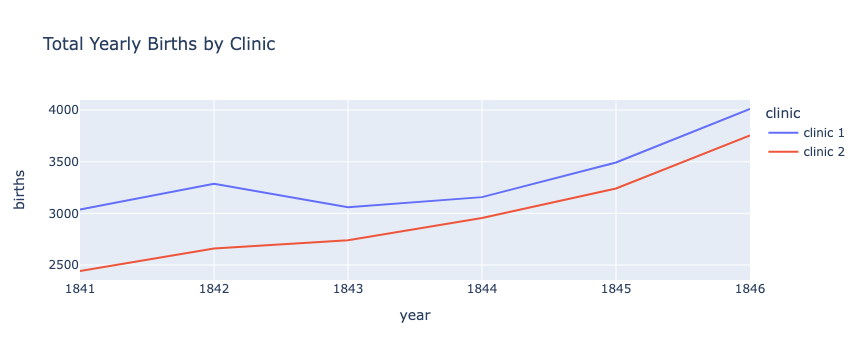

In [25]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

We see that more and more women gave birth at the hospital over the years. Clinic was the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

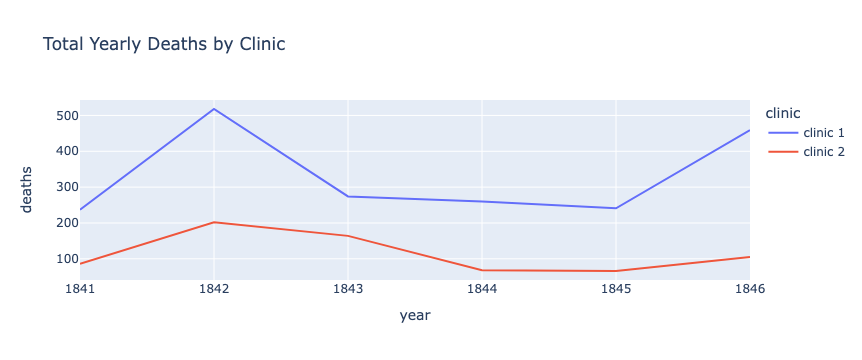

In [26]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

We also see that, not only were more people born in clinic 1, more people also died in clinic 1.

### Calculate the Proportion of Deaths at Each Clinic

We calculate the proportion of maternal deaths per clinic. 

* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).


In [27]:
df_yearly['pct_deaths'] = round(df_yearly.deaths /  df_yearly.births, 2)

In [28]:
df_yearly

year  births  deaths    clinic  pct_deaths
0   1841    3036     237  clinic 1        0.08
1   1842    3287     518  clinic 1        0.16
2   1843    3060     274  clinic 1        0.09
3   1844    3157     260  clinic 1        0.08
4   1845    3492     241  clinic 1        0.07
5   1846    4010     459  clinic 1        0.11
6   1841    2442      86  clinic 2        0.04
7   1842    2659     202  clinic 2        0.08
8   1843    2739     164  clinic 2        0.06
9   1844    2956      68  clinic 2        0.02
10  1845    3241      66  clinic 2        0.02
11  1846    3754     105  clinic 2        0.03

In [29]:
avg_c1 = clinic1.deaths.sum() / clinic1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [30]:
avg_c2 = clinic2.deaths.sum() / clinic2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


### Plotting the Proportion of Yearly Deaths by Clinic

* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

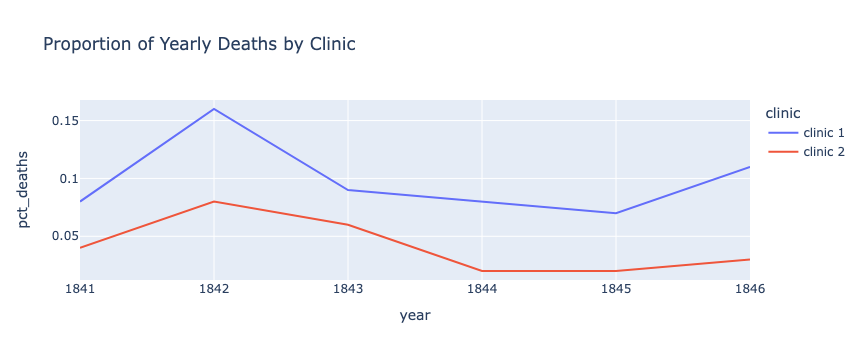

In [31]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

 About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2. Still, clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [32]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [33]:
df_monthly['pct_deaths'] = round(df_monthly.deaths /  df_monthly.births, 2)
df_monthly.head(2)

date  births  deaths  pct_deaths
0 1841-01-01     254      37        0.15
1 1841-02-01     239      18        0.08

In [34]:
before_df = df_monthly[df_monthly.date < handwashing_start]
after_df = df_monthly[df_monthly.date >= handwashing_start]

In [35]:
avg_before = before_df.deaths.sum() / before_df.births.sum() * 100
print(f'Average death rate prior to June 1947 {avg_before:.4}%.')

Average death rate prior to June 1947 10.53%.


In [36]:
avg_after = after_df.deaths.sum() / after_df.births.sum() * 100
print(f'Average death rate after June 1947 {avg_after:.3}%.')

Average death rate after June 1947 2.15%.


### Calculate a Rolling Average of the Death Rate

We create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing. We set the dates as the index in order to avoid the date column being dropped during the calculation.

In [37]:
roll_df = before_df.set_index('date')

In [38]:
roll_df = roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

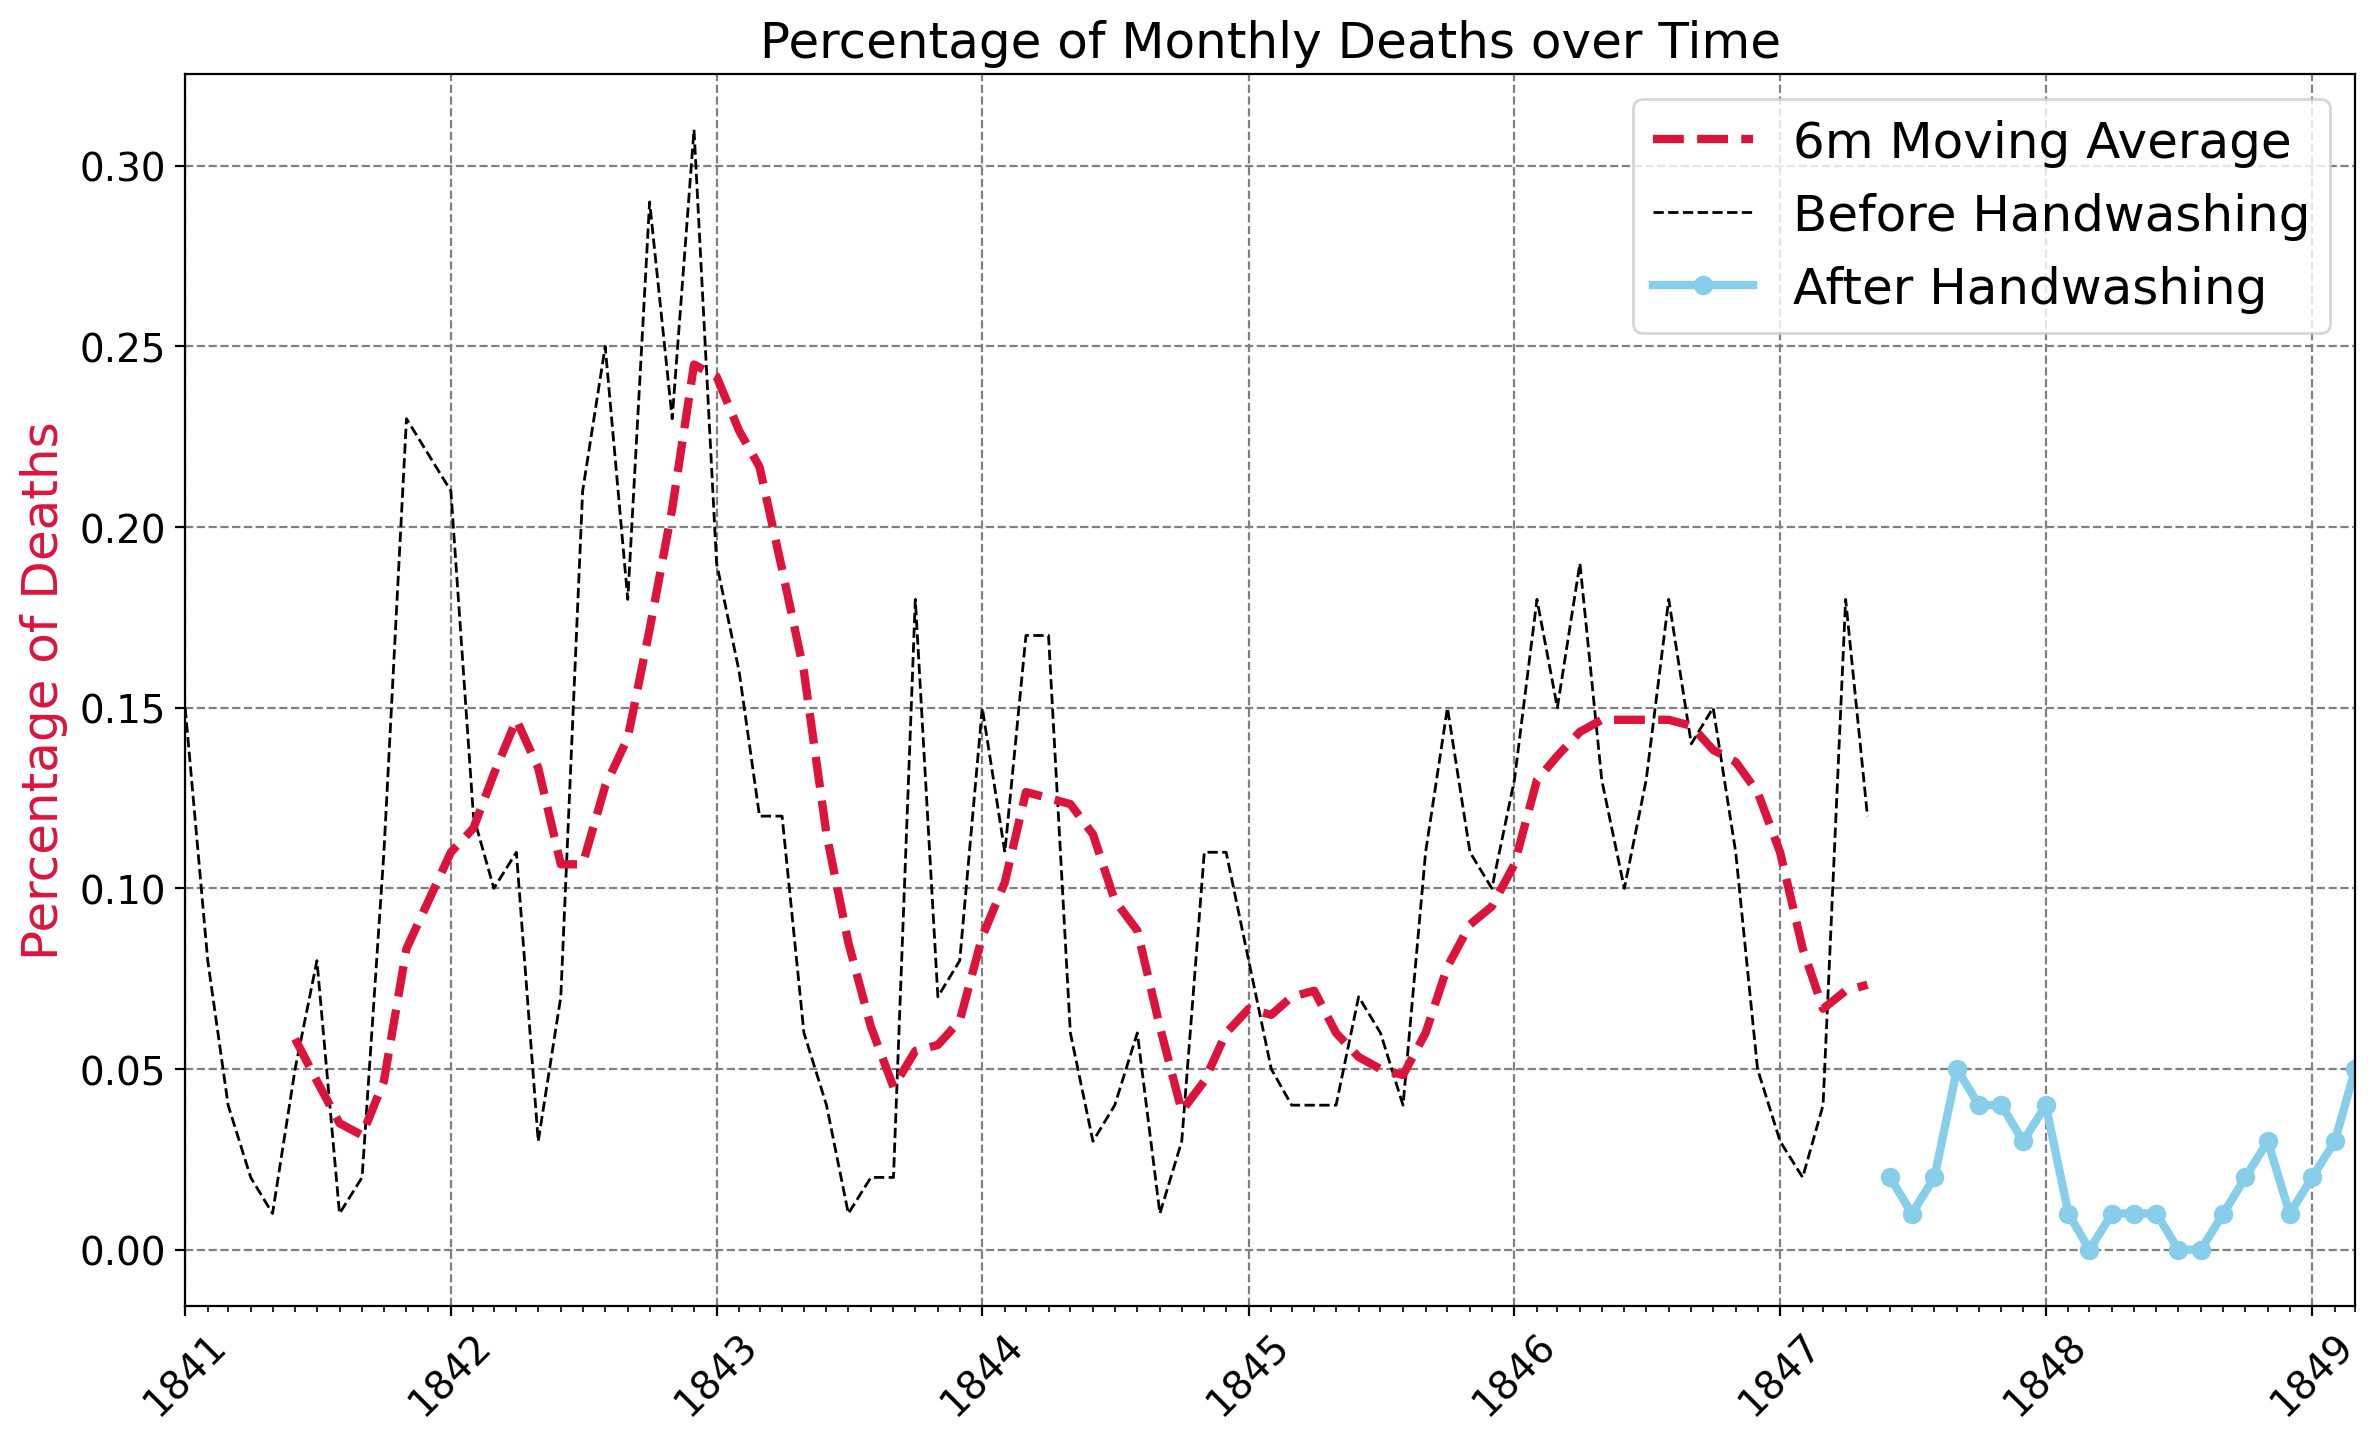

In [39]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax = plt.gca()

bw_line, = plt.plot(before_df.date,
         before_df.pct_deaths, 
         color = 'black', 
         linewidth=1,
         linestyle='--',
         label='Before Handwashing')

aw_line, = plt.plot(after_df.date,
         after_df.pct_deaths, 
         color = 'skyblue', 
         linewidth=3, 
         marker='o',
         label='After Handwashing')

ma_line, = plt.plot(roll_df.index,
         roll_df.pct_deaths, 
         color = 'crimson', 
         linewidth=3,
         linestyle='--',
         label='6m Moving Average')

ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax.grid(color='grey', linestyle='--')

 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18) 

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate


In [46]:
avg_prob_before = before_df.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing was made obligatory: {avg_prob_before:.3}%.')

avg_prob_after = after_df.pct_deaths.mean() * 100
print(f'Chance of death during childbirth after handwashing was made obligatory: {avg_prob_after:.3}%.')

Chance of death during childbirth before handwashing was made obligatory: 10.5%.
Chance of death during childbirth after handwashing was made obligatory: 2.09%.


In [47]:
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Handwashing reduced the monthly proportion of deaths by 8.37%!
This is a 5.0x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [42]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

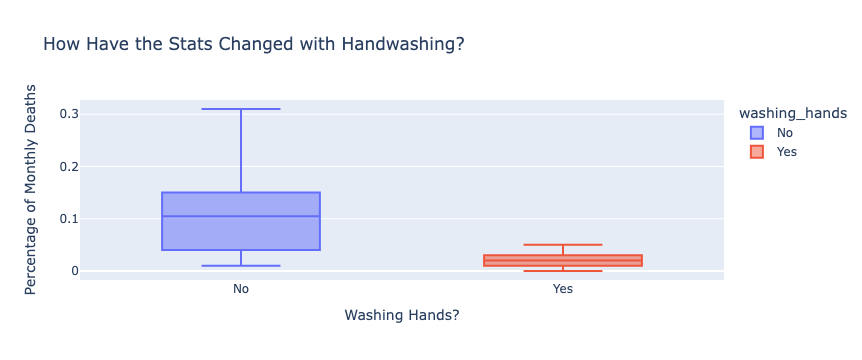

In [43]:
box = px.box(df_monthly, 
             x=df_monthly.washing_hands, # or x='washing_hands', 
             y=df_monthly.pct_deaths, # or y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent with the `opacity` parameter
* Display your box plot on the top of the histogram using the `marginal` parameter. 

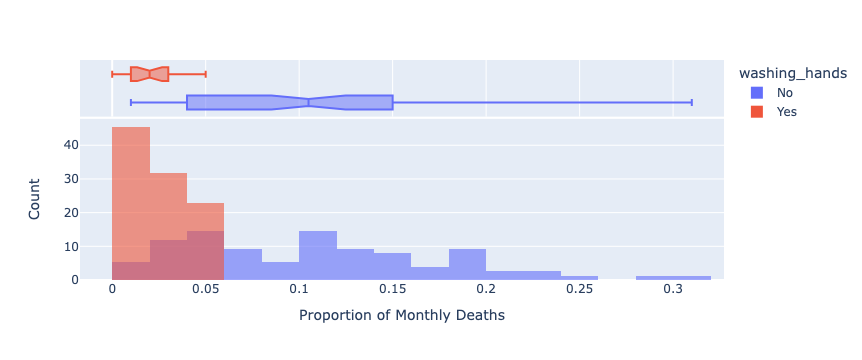

In [62]:
hist = px.histogram(df_monthly,
                    x="pct_deaths", 
                    color='washing_hands',
                    histnorm='percent',
                    opacity=0.6,
                    barmode='overlay',
                    nbins=30,
                    marginal='box')
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)

hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

We use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 



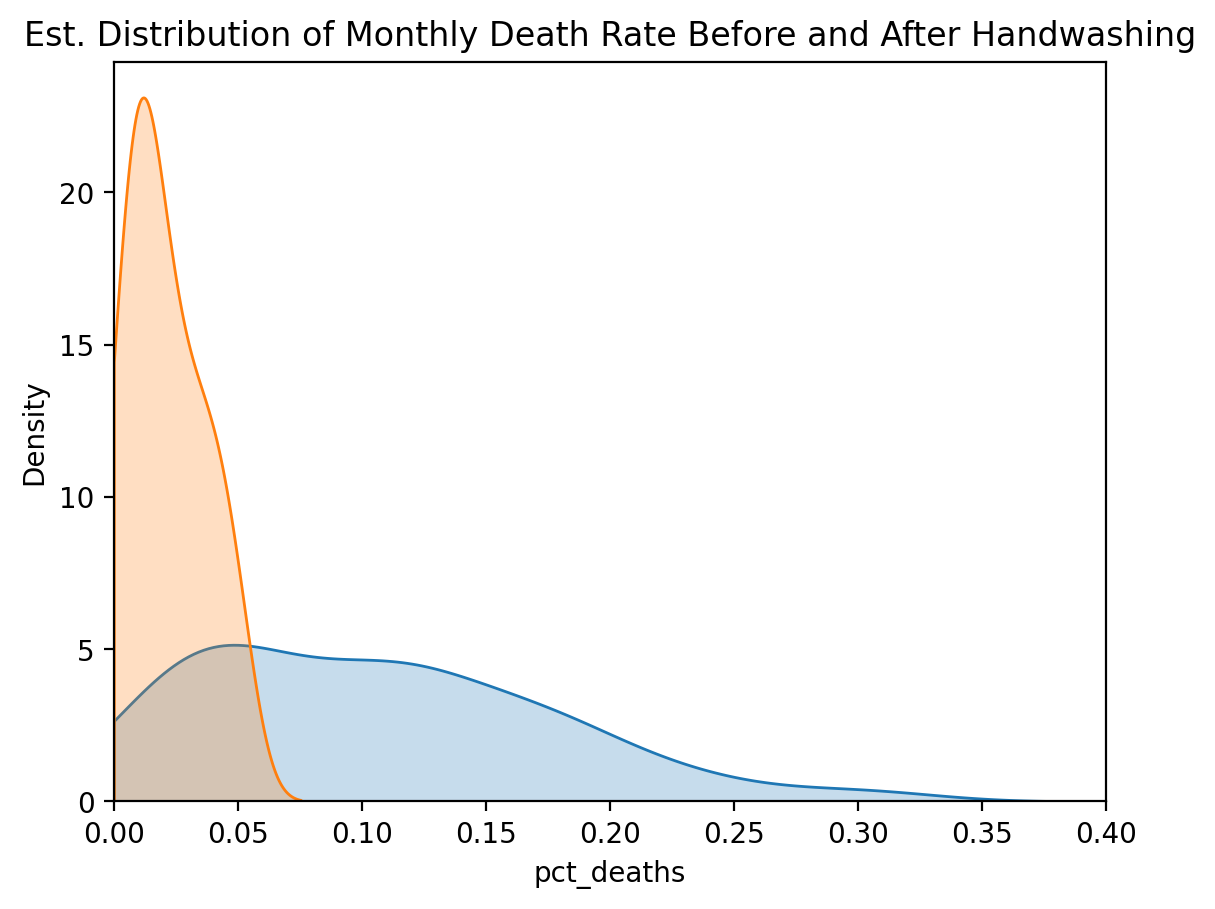

In [72]:
plt.figure(dpi=200)
sns.kdeplot(before_df.pct_deaths, 
            fill=True,
            clip=(0,1)) # Do not evaluate the density outside of these limits.
sns.kdeplot(after_df.pct_deaths, 
            fill=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

We use a t-test to determine if the differences in the means are statistically significant or purely due to chance. We use the [`.ttest_ind()` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value.
 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 




In [76]:
t_stat, p_value = stats.ttest_ind(a=before_df.pct_deaths, 
                                  b=after_df.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002836
t-statstic is 5.523




<img src=https://i.imgur.com/rvjNVzQ.gif>